# Introduction to Machine Learning: Decision Trees, Random Forest and Ensemble Learning
## Patrick Chao 3/7/18

While we have discussed how kNN is affected by the bias-variance tradeoff, we may now shift gears into **Decision Trees**. Decision trees rely on a relatively simple idea, separate data points using linear decision boundaries to cluster data points of the same class into the same region. These are similar to passing through a flow chartm except there are quantities on each node of the flow chart.

<img src="xkcd.png" width="30%">
Image from xkcd. 

One very basic decision tree is as follows:

<img src="meme.png" width="35%">
Meme credit to $\text{Rosa Choe}^{\text{TM}}$

At each node, we consider one feature and value and split the data between less and greater than the value. This cuts up the feature space into rectangular regions. In decision trees, it is important to specify that we split on a certain value. Thus in the meme above, the set of features could be an integer value for the number of free hours a week and a boolean value represented as a $0$ or $1$ for whether CS 61A has been taken, 61B, etc. The splitting value would be $10$ for the number of free hours a week, and $0.5$ for each of the boolean variables.

## Entropy
In the case of the irises, we could also use all four features, sepal and petal width and length, and create a decision tree to split on all the features. However, how do we decide what feature to split on first, and what value? We rely on a notion known as **entropy**. Entropy measures how the amount of randomness is in a state, or equivalently how much information is contained in the state. For example, if we flip a fair coin, each state is equally likely meaning there is the maximnum amount of randomness. Entropy can also be understood as how much "surprise" there is from each state. Below is an image of entropy of a biased coin with varying degrees of bias.

<img src="Entropy.png" width="30%">

The entropy formula can be written as 

$$\text{Entropy} = \sum P(x_i)\ln(x_i)$$ 
where the $X_i$ are the possible states.

In decision trees, when we split across a feature, we would like to reduce the overall entropy of the system as much as possible. Thus we create decision trees by considering each feature and the maximum change in entropy in across all values. In doing so, we attempt to separate the data as much as possible in separate regions.


These create trees since there paths for the less and greater than value at each branch. If a node is "pure", meaning it only contains elements of one class, then we no longer need to split. We can continually split the data further and further until all leaves are pure, but this may lead to overfitting. One method of preventing overfitting is restricting tree depth. This may be interpreted similarly to kNN with a low value for $k$, it segments the space into smaller and smaller areas, representing high variance.



<img src="DecisionTreeError.png" width="60%">
Image from http://www.cs.cornell.edu/courses/cs4780/2017sp/lectures/lecturenote17.html

Below is a demo from scikit learn with decision trees classifying irises through using pairwise features. Each pair of features has a different segmented regions to classify points.

In [1]:
#From http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
iris = datasets.load_iris()

# Load data
def plotPairwiseDecisionTrees(tree_depth=None):
    plt.figure(figsize = (10,7))
    # Parameters
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Train
        clf = DecisionTreeClassifier(max_depth=tree_depth).fit(X, y)

        # Plot the decision boundary
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    if tree_depth == None:
        plt.suptitle("Decision surface of a decision tree using paired features with max depth")
    else:
        plt.suptitle("Decision surface of a decision tree using paired features with depth %i" %tree_depth )
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

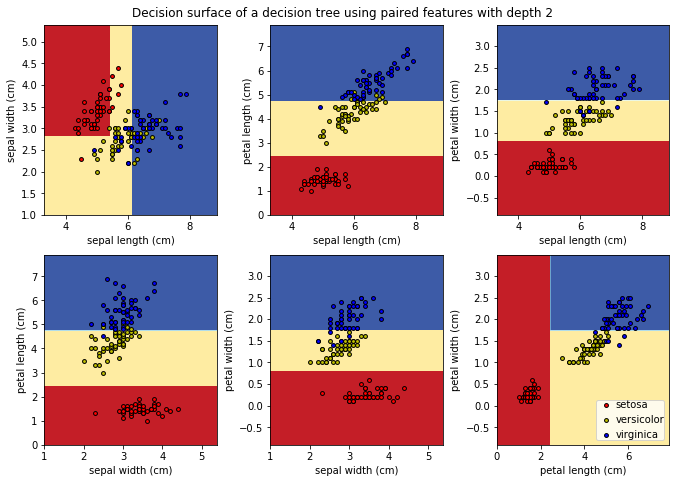

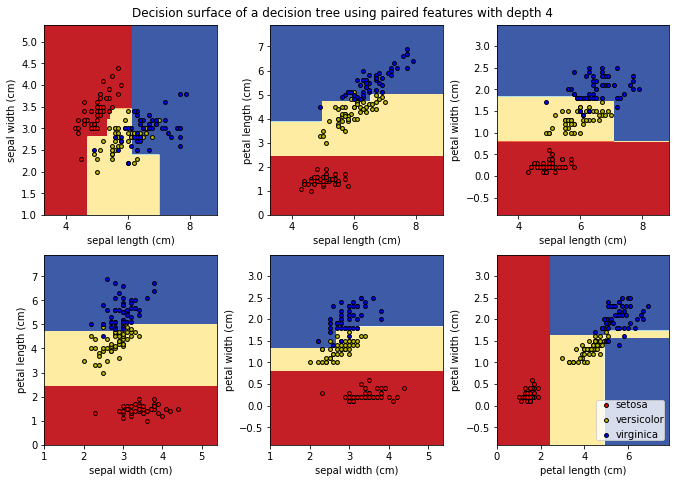

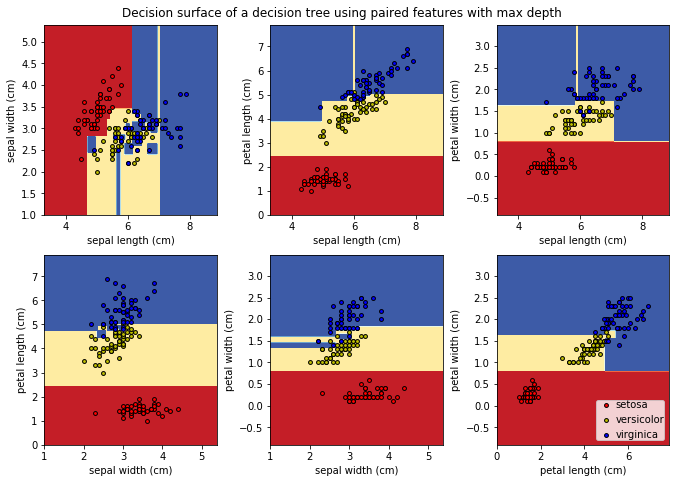

In [2]:
#Max Depth 2
plotPairwiseDecisionTrees(2)
#Max Depth 4
plotPairwiseDecisionTrees(4)
#No Max Depth
plotPairwiseDecisionTrees()

Above is a spatial representation of how different regions are classified. The decision boundary is a collection of rectangular sections, which becomes more and more complex as the depth of the tree increases. 

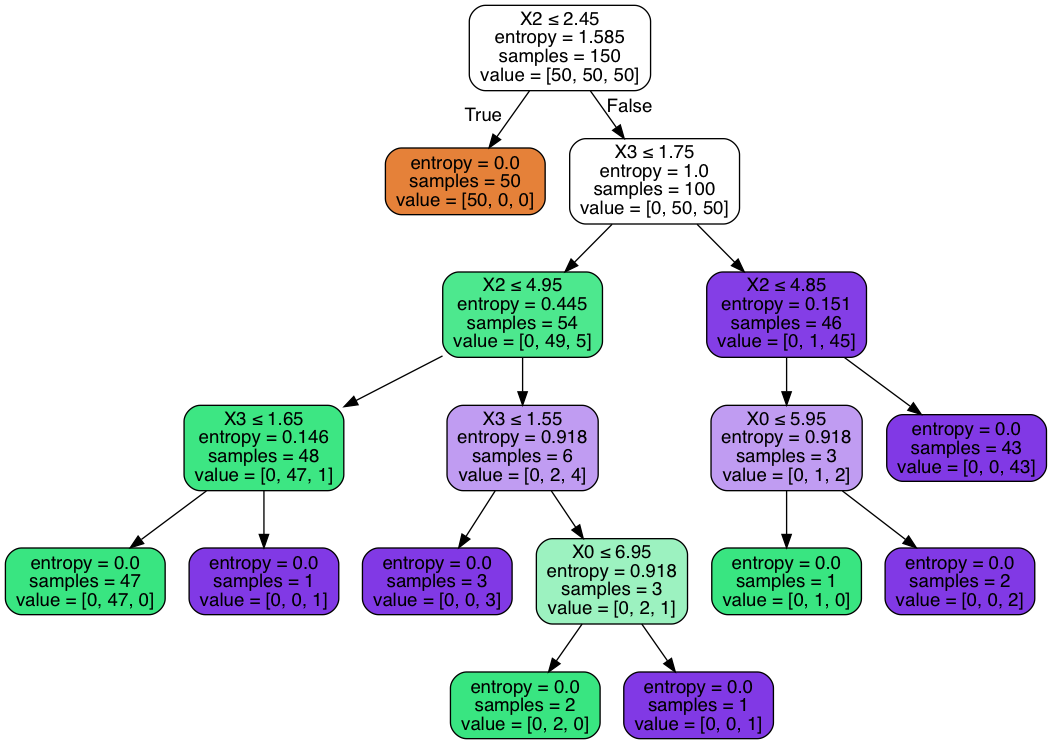

In [3]:
#Code from https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
plt.figure(figsize = (8,5))
#need to pip install pydotplus and brew install graphviz
model = DecisionTreeClassifier(criterion="entropy").fit(iris.data,iris.target)
dot_data = StringIO()
export_graphviz(model , out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The above tree represents how the decision tree actually does the splitting. The splitting feature and value is the first row, for example the first node splits on the $X2$ feature which is petal length and perfectly splits out all the red elements. It splits on petal length values of $2.45$. If we look at the above plots, we notice that this also serves to perfectly split the red irises with a single decision boundary on petal length. The second value represents the entropy of the current state, we aim to reduce this entropy as much as possible. All of the final leafs are pure, meaning they only contain a single class of samples. Since the dataset is relatively simple and small, we may only want shallow trees so that we do not overfit.


Something that we mentioned before was that since we only have a single occurence of a model, bias and variance are both incredibly important so that we have low errors on a single model. Low bias and high variance means an average model will perform well, but the models performance may vary highly. On the other hand, high bias and low variance means that our model may perform very consistently, but consistently bad. However, is there anyway to get the both of best worlds? Low bias and low variance is the goal of all machine learning models.

# Ensemble Learning
One solution is **ensemble learning**! Ensemble learning relies on the notion of aggregating multiple models and using the average classification of those models. We could create multiple decision trees for iris classification and average the prediction overall of the trees and use that as our prediction. What happens when we use a lot of trees? We get **random forest**. However, if we just created a bunch of decision trees, we would get the same decision tree each time. What we can do is sample what datapoints we would like our decision tree to train on, and select which subset of features we would like our decision tree to utilize. 

<img src="RandomForest.png" width="60%">

Image from https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d